# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Install Required Libraries

In [ ]:
## Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat_ws, sum, to_date, to_timestamp

In [2]:
spark = SparkSession.builder \
    .appName("CrashDataAnalysis") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [3]:
# Write code to load the data and check the schema
collisions_df = spark.read.csv("Crash_Data_Analysis_Dataset/sample_collisions.csv", header=True)
victims_df = spark.read.csv("Crash_Data_Analysis_Dataset/sample_victims.csv", header=True)

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [4]:
#Display Schema & Sample Data
collisions_df.printSchema()

root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: string (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: string (nullable = true)
 |-- st

In [5]:
victims_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- case_id: string (nullable = true)
 |-- party_number: string (nullable = true)
 |-- victim_role: string (nullable = true)
 |-- victim_sex: string (nullable = true)
 |-- victim_age: string (nullable = true)
 |-- victim_degree_of_injury: string (nullable = true)
 |-- victim_seating_position: string (nullable = true)
 |-- victim_safety_equipment_1: string (nullable = true)
 |-- victim_safety_equipment_2: string (nullable = true)
 |-- victim_ejected: string (nullable = true)



##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [6]:
#Check for Missing Values
def check_missing_values(df):
    print("Total Rows : ", df.count())
    sparse_cols = []
    filter_cols = []
    for col in df.columns:
        null_count = df.filter(df[col].isNull()).count()
        if null_count > 0:
            print(col, ":", null_count)
        if null_count >= 150000:
            sparse_cols.append(col)
        if null_count < 150000 and null_count > 0:
            filter_cols.append(col)
    return sparse_cols, filter_cols

In [7]:
col_sparse_cols, col_filter_cols = check_missing_values(collisions_df)

Total Rows :  935791
jurisdiction : 1158
officer_id : 2264
reporting_district : 552653
population : 165
special_condition : 51730
chp_beat_class : 274
beat_number : 80780
primary_road : 10
secondary_road : 2
direction : 232663
intersection : 9484
weather_1 : 4626
state_highway_indicator : 318
caltrans_county : 682075
caltrans_district : 648728
state_route : 648728
postmile : 648728
location_type : 682075
side_of_highway : 682077
tow_away : 6153
killed_victims : 200
injured_victims : 230
primary_collision_factor : 5660
pcf_violation_category : 15424
pcf_violation : 64175
pcf_violation_subsection : 601427
type_of_collision : 7655
motor_vehicle_involved_with : 4887
pedestrian_action : 615
road_surface : 8141
road_condition_1 : 7903
lighting : 5301
control_device : 5791
statewide_vehicle_type_at_fault : 186119
chp_vehicle_type_at_fault : 251662
latitude : 669049
longitude : 669049
collision_time : 8084


In [8]:
vic_sparse_cols, vic_filter_cols = check_missing_values(victims_df)

Total Rows :  963933
victim_role : 1
victim_sex : 24041
victim_age : 32145
victim_seating_position : 1913
victim_safety_equipment_1 : 55215
victim_safety_equipment_2 : 310220
victim_ejected : 4272


In [9]:
# Drop Sparse Columns
for col in col_sparse_cols:
    collisions_df = collisions_df.drop(col)

for col in vic_sparse_cols:
    victims_df = victims_df.drop(col)

In [10]:
print("Collisions Row Count: ", collisions_df.count())
print("Victims Row Count: ", victims_df.count())

Collisions Row Count:  935791
Victims Row Count:  963933


In [11]:
#Handle Missing Values
collisions_df.createOrReplaceTempView('col_df')
for col in col_filter_cols:
    print(spark.sql(f'select {col}, count(*) as columns from col_df group by {col} order by columns desc').show())

+------------+-------+
|jurisdiction|columns|
+------------+-------+
|      1942.0|  74054|
|      1900.0|  39397|
|      9550.0|  16598|
|      9590.0|  15220|
|      9675.0|  14997|
|      9840.0|  13392|
|      9530.0|  13325|
|      9250.0|  13197|
|      9535.0|  12445|
|      9525.0|  12421|
|      9340.0|  12287|
|      9645.0|  12193|
|      3600.0|  11769|
|      9252.0|  11745|
|      3300.0|  11637|
|       109.0|  11468|
|      1941.0|  11119|
|      9565.0|  10383|
|      9420.0|   9590|
|      9435.0|   9421|
+------------+-------+
only showing top 20 rows

None
+----------+-------+
|officer_id|columns|
+----------+-------+
|      NULL|   2264|
|       415|    587|
|     34426|    478|
|       288|    460|
|       134|    437|
|       127|    428|
|        24|    423|
|     30452|    422|
|       356|    419|
|       129|    414|
|     34959|    413|
|     99999|    381|
|       180|    362|
|     25495|    334|
|       205|    330|
|       525|    317|
|       224|    31

In [12]:
col_filter_cols = ['jurisdiction', 'officer_id', 'beat_number', 'primary_road', 'secondary_road', 'collision_time']
collisions_df = collisions_df.dropna(subset=col_filter_cols)
collisions_df = collisions_df.fillna({"population": "unincorporated", 
                                      "special_condition": "0.0", 
                                      "chp_beat_class": "not chp", 
                                      "intersection": "0.0", 
                                      "weather_1": "clear", 
                                      "state_highway_indicator": "0.0", 
                                      "tow_away": "1.0", 
                                      "killed_victims": "0.0", 
                                      "injured_victims": "0.0", 
                                      "primary_collision_factor": "unknown", 
                                      "pcf_violation_category": "unknown", 
                                      "pcf_violation": "0.0", 
                                      "type_of_collision": "rear end", 
                                      "motor_vehicle_involved_with": "other motor vehicle", 
                                      "pedestrian_action": "no pedestrian involved", 
                                      "road_surface": "dry", 
                                      "road_condition_1": "normal", 
                                      "lighting": "daylight", 
                                      "control_device": "none"})

In [13]:
# victims_df = victims_df.dropna(subset=vic_filter_cols)
victims_df.createOrReplaceTempView('vic_df')
for col in vic_filter_cols:
    print(spark.sql(f'select {col}, count(*) as columns from vic_df group by {col} order by columns desc').show())

+-----------------+-------+
|      victim_role|columns|
+-----------------+-------+
|        passenger| 549125|
|           driver| 331933|
|non-injured party|  29797|
|       pedestrian|  28779|
|        bicyclist|  23289|
|            other|   1009|
|             NULL|      1|
+-----------------+-------+

None
+----------+-------+
|victim_sex|columns|
+----------+-------+
|    female| 471349|
|      male| 468519|
|      NULL|  24041|
|         4|     13|
|         3|      5|
|         X|      4|
|         1|      2|
+----------+-------+

None
+----------+-------+
|victim_age|columns|
+----------+-------+
|      NULL|  32145|
|      18.0|  30644|
|      19.0|  30095|
|      20.0|  27749|
|      21.0|  27072|
|      17.0|  25771|
|      22.0|  24600|
|      23.0|  23289|
|      24.0|  21827|
|      16.0|  20825|
|      25.0|  20513|
|      26.0|  18837|
|      27.0|  17736|
|      28.0|  16570|
|      15.0|  16511|
|      29.0|  15811|
|      30.0|  15111|
|      14.0|  14351|
|      3

In [14]:
from pyspark.sql.functions import mean
vic_filter_cols = ['victim_role']

# victim_age_mean = victims_df.select(round(mean("victim_age"), 0)).collect()[0][0]
victims_df = victims_df.dropna(subset=vic_filter_cols)
victims_df = victims_df.fillna({"victim_sex": "female", 
                                "victim_age": str(victims_df.select(mean("victim_age")).collect()[0][0]), 
                                "victim_seating_position": "position unknown", 
                                "victim_safety_equipment_1": "unknown", 
                                "victim_ejected": "unknown"})

In [15]:
# Convert Data Types
from pyspark.sql.functions import col, concat_ws, year, month, dayofmonth, hour, dayofweek, quarter

# Convert to Integer datatypes
int_cols = ['jurisdiction', 'distance', 'intersection', 'state_highway_indicator', 'tow_away', 'killed_victims', 'injured_victims', 'party_count', 'pedestrian_collision', \
            'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_private_property', 'chp_road_type', 'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count', \
            'pedestrian_killed_count', 'pedestrian_injured_count', 'bicyclist_killed_count', 'bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count', \
            'id', 'party_number', 'victim_age']

double_cols = ['case_id']

# Convert to Date datatypes
date_cols = ['collision_date', 'process_date']

# Convert to Timestamp datatypes
time_cols = ['collision_time']

def convert_datatypes(df):
    for column in df.columns:
        if column in int_cols:
            df = df.withColumn(column, col(column).cast("int"))
        if column in double_cols:
            df = df.withColumn(column, col(column).cast("double"))
        if column in time_cols:
            df = df.withColumn("collision_timestamp", concat_ws(" ", col("collision_date"), col(column)))
            df = df.withColumn("collision_timestamp", to_timestamp("collision_timestamp", "yyyy-MM-dd HH:mm:ss"))
            df = df.withColumn("collision_day", dayofmonth("collision_timestamp"))
            df = df.withColumn("collision_month", month("collision_timestamp"))
            df = df.withColumn("collision_quarter", quarter("collision_timestamp"))
            df = df.withColumn("collision_year", year("collision_timestamp"))
            df = df.withColumn("collision_hour", hour("collision_timestamp"))
            df = df.withColumn("collision_weekday", dayofweek("collision_timestamp"))
        if column in date_cols:
            df = df.withColumn(column, to_date(column, "yyyy-MM-dd"))
    return df

In [16]:
collisions_df_convert = convert_datatypes(collisions_df)
victims_df_convert = convert_datatypes(victims_df)

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [17]:
#Remove Duplicates
collisions_df_dedup = collisions_df_convert.dropDuplicates()
print("Collisions after deduplication", collisions_df_dedup.count())

victims_df_dedup = victims_df_convert.dropDuplicates()
print("Victims after deduplication", victims_df_dedup.count())

Collisions after deduplication 845609
Victims after deduplication 963932


In [18]:
#Detect Outliers using IQR

# List of numerical columns to check for outliers
from pyspark.sql.functions import col, sum, mean, median, min, max, countDistinct

for col in int_cols:
    if col in collisions_df_dedup.columns:
        collisions_df_dedup.select(col).summary().show()

+-------+-----------------+
|summary|     jurisdiction|
+-------+-----------------+
|  count|           845609|
|   mean|6167.341100910705|
| stddev|3511.245366515047|
|    min|              100|
|    25%|             2711|
|    50%|             9130|
|    75%|             9535|
|    max|             9870|
+-------+-----------------+

+-------+------------------+
|summary|          distance|
+-------+------------------+
|  count|            845609|
|   mean| 726.1064640986556|
| stddev|13077.145281229019|
|    min|                 0|
|    25%|                 5|
|    50%|               100|
|    75%|               500|
|    max|           8363520|
+-------+------------------+

+-------+-------------------+
|summary|       intersection|
+-------+-------------------+
|  count|             845609|
|   mean|0.21817057292436576|
| stddev|  0.413004086843752|
|    min|                  0|
|    25%|                  0|
|    50%|                  0|
|    75%|                  0|
|    max|     

In [19]:
for col in int_cols:
    if col in victims_df_dedup.columns:
        victims_df_dedup.select(col).summary().show()

+-------+------------------+
|summary|                id|
+-------+------------------+
|  count|            963932|
|   mean|2360412.8129453114|
| stddev| 1769992.271776248|
|    min|                 2|
|    25%|            967295|
|    50%|           2169201|
|    75%|           3374880|
|    max|           8817530|
+-------+------------------+

+-------+------------------+
|summary|      party_number|
+-------+------------------+
|  count|            963932|
|   mean| 1.629732180278277|
| stddev|0.7173611085803573|
|    min|                 1|
|    25%|                 1|
|    50%|                 2|
|    75%|                 2|
|    max|                88|
+-------+------------------+

+-------+------------------+
|summary|        victim_age|
+-------+------------------+
|  count|            963932|
|   mean|31.127832668694474|
| stddev|19.610915560045722|
|    min|                 0|
|    25%|                18|
|    50%|                28|
|    75%|                44|
|    max|   

In [20]:
outlier_cols = ['distance', 'injured_victims', 'complaint_of_pain_injury_count', 'victim_age']

##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [21]:
#Remove Outliers
def remove_outliers(df):
    for col in outlier_cols:
        if col in df.columns:
            Q1 = df.approxQuantile(col,[0.25],relativeError=0)
            Q3 = df.approxQuantile(col,[0.75],relativeError=0)
        
            IQR = Q3[0] - Q1[0]
            
            lower =  Q1[0] - 1.5*IQR
            upper =  Q3[0] + 1.5*IQR

            df = df.filter(df[col]>=lower)
            df = df.filter(df[col]<=upper)

    return df

collisions_df_clean = remove_outliers(collisions_df_dedup)
victims_df_clean = remove_outliers(victims_df_dedup)

print("Collisions after cleaning: ", collisions_df_clean.count())
print("Victims after cleaning: ", victims_df_clean.count())

Collisions after cleaning:  715855
Victims after cleaning:  957044


#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [22]:
collisions_df_clean.printSchema()

root
 |-- case_id: double (nullable = true)
 |-- jurisdiction: integer (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = false)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = false)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = false)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: integer (nullable = true)
 |-- intersection: integer (nullable = true)
 |-- weather_1: string (nullable = false)
 |-- state_highway_indicator: integer (nullable = true)
 |-- tow_away: integer (nullable = true)
 |-- collision_severity: string (nullable = true)
 |-- killed_victims: integer (nullable = true)
 |-- injured_victims: integer (nullable = true)


In [23]:
victims_df_clean.printSchema()

root
 |-- id: integer (nullable = true)
 |-- case_id: double (nullable = true)
 |-- party_number: integer (nullable = true)
 |-- victim_role: string (nullable = true)
 |-- victim_sex: string (nullable = false)
 |-- victim_age: integer (nullable = true)
 |-- victim_degree_of_injury: string (nullable = true)
 |-- victim_seating_position: string (nullable = false)
 |-- victim_safety_equipment_1: string (nullable = false)
 |-- victim_ejected: string (nullable = false)



In [24]:
# Identifying categorical columns
cat_cols = ['chp_shift', 'population', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'weather_1', 'collision_severity', 'hit_and_run', \
             'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', \
             'control_device', 'statewide_vehicle_type_at_fault', \
             'victim_role', 'victim_sex', 'victim_degree_of_injury', 'victim_seating_position', 'victim_safety_equipment_1', 'victim_safety_equipment_2', 'victim_ejected']

num_cols = ['distance', 'killed_victims', 'injured_victims', 'party_count', 'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count', \
            'pedestrian_killed_count', 'pedestrian_injured_count', 'bicyclist_killed_count', 'bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count', \
            'id', 'party_number', 'victim_age']

In [25]:
collisions_df_clean.createOrReplaceTempView('collisions_df')
victims_df_clean.createOrReplaceTempView('victims_df')

for col in cat_cols:
    if col in collisions_df_clean.columns:
        spark.sql(f'select {col}, count({col}) from collisions_df group by {col} order by count({col});').show()
    if col in victims_df_clean.columns:
        spark.sql(f'select {col}, count({col}) from victims_df group by {col} order by count({col});').show()

+--------------+----------------+
|     chp_shift|count(chp_shift)|
+--------------+----------------+
|2200 thru 0559|           48340|
|0600 thru 1359|          121843|
|1400 thru 2159|          148507|
|       not chp|          397165|
+--------------+----------------+

+----------------+-----------------+
|      population|count(population)|
+----------------+-----------------+
|           <2500|             3460|
|   2500 to 10000|             8648|
|  10000 to 25000|            29095|
|  25000 to 50000|            64862|
|100000 to 250000|           132984|
| 50000 to 100000|           134145|
|  unincorporated|           153960|
|         >250000|           188701|
+----------------+-----------------+

+--------------------+----------------+
|           beat_type|count(beat_type)|
+--------------------+----------------+
|schoolbus on city...|            2308|
| chp county roadline|           37227|
| chp county roadarea|           64505|
|   chp state highway|          214650|
| 

In [26]:
# Removing dirty values
from pyspark.sql.functions import col, length

for column in cat_cols:
    if column in collisions_df_clean.columns:
        collisions_df_clean = collisions_df_clean.filter(length(col(column)) > 2)
    if column in victims_df_clean.columns:
        victims_df_clean = victims_df_clean.filter(length(col(column)) > 2)

In [27]:
collisions_df_clean.createOrReplaceTempView('collisions_df')
victims_df_clean.createOrReplaceTempView('victims_df')

for col in cat_cols:
    if col in collisions_df_clean.columns:
        spark.sql(f'select {col}, count({col}) from collisions_df group by {col} order by count({col});').show()
    if col in victims_df_clean.columns:
        spark.sql(f'select {col}, count({col}) from victims_df group by {col} order by count({col});').show()

+--------------+----------------+
|     chp_shift|count(chp_shift)|
+--------------+----------------+
|2200 thru 0559|           48334|
|0600 thru 1359|          121832|
|1400 thru 2159|          148503|
|       not chp|          397158|
+--------------+----------------+

+----------------+-----------------+
|      population|count(population)|
+----------------+-----------------+
|           <2500|             3460|
|   2500 to 10000|             8647|
|  10000 to 25000|            29094|
|  25000 to 50000|            64861|
|100000 to 250000|           132983|
| 50000 to 100000|           134135|
|  unincorporated|           153952|
|         >250000|           188695|
+----------------+-----------------+

+--------------------+----------------+
|           beat_type|count(beat_type)|
+--------------------+----------------+
|schoolbus on city...|            2308|
| chp county roadline|           37227|
| chp county roadarea|           64505|
|   chp state highway|          214629|
| 

In [28]:
print("Final row count - Collisions: ", collisions_df_clean.count()) 
print("Final row count - Victims: ",victims_df_clean.count())

Final row count - Collisions:  715827
Final row count - Victims:  957004


In [29]:
# Encode Categorical Variables

# String Indexing for Categorical Columns


In [30]:
# Reordering & Renaming Columns
final_collisions_df = spark.sql("""SELECT case_id, 
                                 population, 
                                 county_city_location as city, 
                                 county_location as county, 
                                 chp_beat_type as beat_type, 
                                 chp_beat_class as beat_class, 
                                 beat_number, 
                                 primary_road, 
                                 secondary_road, 
                                 distance, 
                                 intersection, 
                                 weather_1 as weather, 
                                 state_highway_indicator as state_highway, 
                                 tow_away, 
                                 collision_severity as severity, 
                                 primary_collision_factor, 
                                 pcf_violation_category, 
                                 hit_and_run, 
                                 type_of_collision, 
                                 motor_vehicle_involved_with, 
                                 road_surface, 
                                 road_condition_1 as road_condition, 
                                 chp_road_type as road_type, 
                                 lighting, 
                                 control_device, 
                                 pedestrian_action, 
                                 pedestrian_collision, 
                                 bicycle_collision, 
                                 motorcycle_collision, 
                                 truck_collision, 
                                 killed_victims as killed, 
                                 injured_victims as injured, 
                                 killed_victims+injured_victims as victims, 
                                 party_count, 
                                 severe_injury_count, 
                                 other_visible_injury_count as visible_injury_count, 
                                 complaint_of_pain_injury_count as pain_injury_count, 
                                 pedestrian_killed_count, 
                                 pedestrian_injured_count, 
                                 bicyclist_killed_count, 
                                 bicyclist_injured_count, 
                                 motorcyclist_killed_count, 
                                 motorcyclist_injured_count, 
                                 collision_date, 
                                 process_date, 
                                 collision_timestamp, 
                                 collision_day, 
                                 collision_month,  
                                 collision_quarter,  
                                 collision_year, 
                                 collision_hour, 
                                 collision_weekday 
                                 from collisions_df""")

In [31]:
# Final cleaned data
final_collisions_df.columns

['case_id',
 'population',
 'city',
 'county',
 'beat_type',
 'beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'distance',
 'intersection',
 'weather',
 'state_highway',
 'tow_away',
 'severity',
 'primary_collision_factor',
 'pcf_violation_category',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'road_surface',
 'road_condition',
 'road_type',
 'lighting',
 'control_device',
 'pedestrian_action',
 'pedestrian_collision',
 'bicycle_collision',
 'motorcycle_collision',
 'truck_collision',
 'killed',
 'injured',
 'victims',
 'party_count',
 'severe_injury_count',
 'visible_injury_count',
 'pain_injury_count',
 'pedestrian_killed_count',
 'pedestrian_injured_count',
 'bicyclist_killed_count',
 'bicyclist_injured_count',
 'motorcyclist_killed_count',
 'motorcyclist_injured_count',
 'collision_date',
 'process_date',
 'collision_timestamp',
 'collision_day',
 'collision_month',
 'collision_quarter',
 'collision_year',
 'collision_hour',
 'collision

Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

In [32]:
final_collisions_df.createOrReplaceTempView('collisions')
victims_df_clean.createOrReplaceTempView('victims')

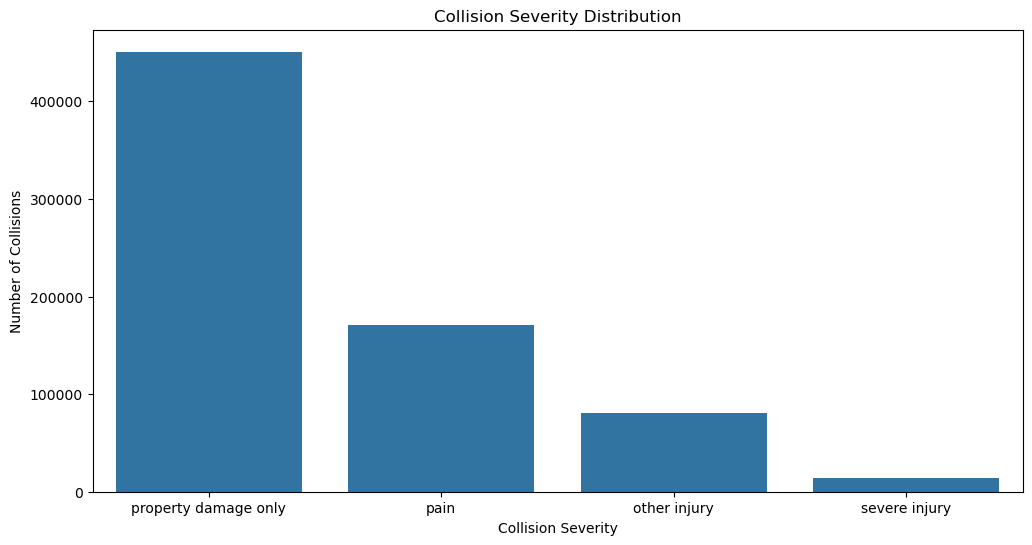

In [33]:
# Univariate Analysis

# Collision Severity Distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
pd_collision_sev = spark.sql('SELECT severity FROM collisions;').toPandas()

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='severity', data=pd_collision_sev)
plt.title('Collision Severity Distribution')
plt.xlabel('Collision Severity')
plt.ylabel('Number of Collisions')
plt.show()

##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

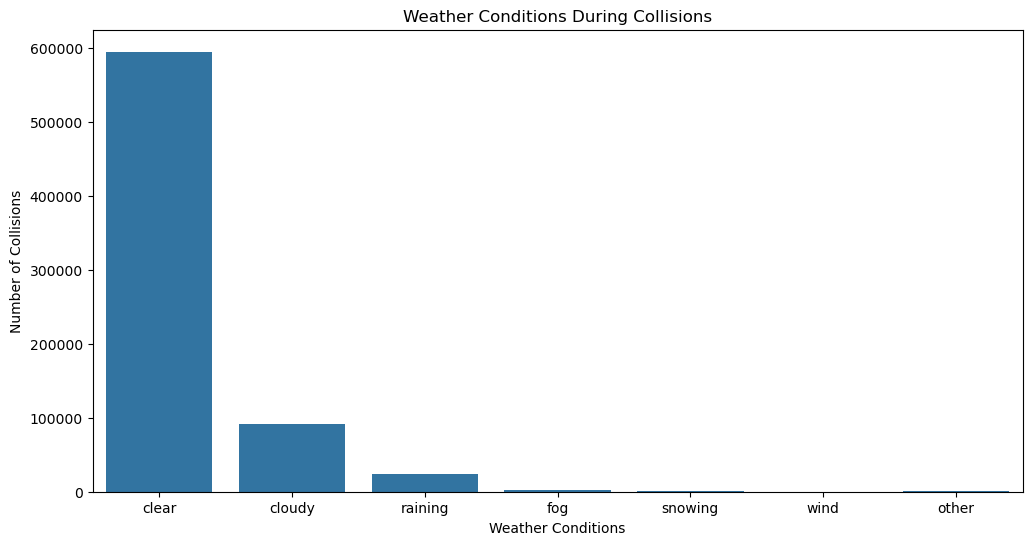

In [34]:
# Weather Conditions During Collisions

# Convert to Pandas
pd_weather = spark.sql('SELECT weather FROM collisions;').toPandas()

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='weather', data=pd_weather)
plt.title('Weather Conditions During Collisions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Collisions')
plt.show()

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

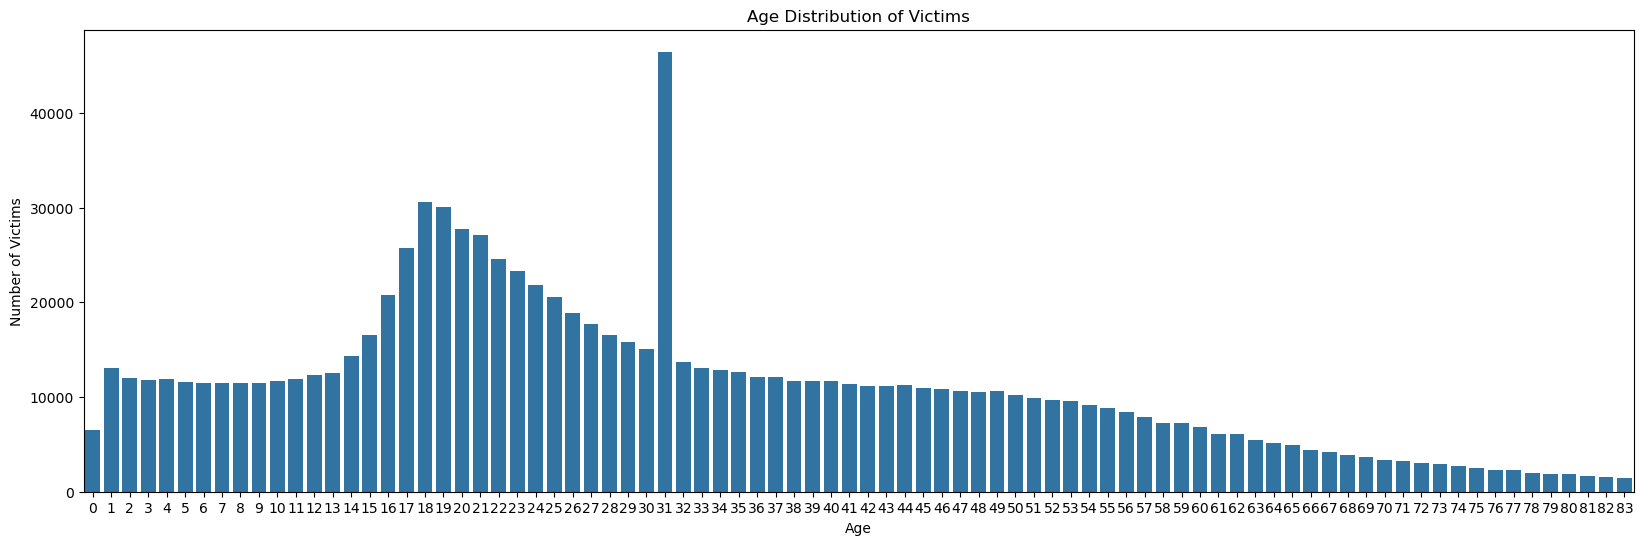

In [35]:
# Distribution of Victim Ages

# Convert to Pandas
pd_victim_age = spark.sql('SELECT victim_age FROM victims ORDER BY victim_age;').toPandas()

# Plot
plt.figure(figsize=(20,6))
sns.countplot(x='victim_age', data=pd_victim_age)
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

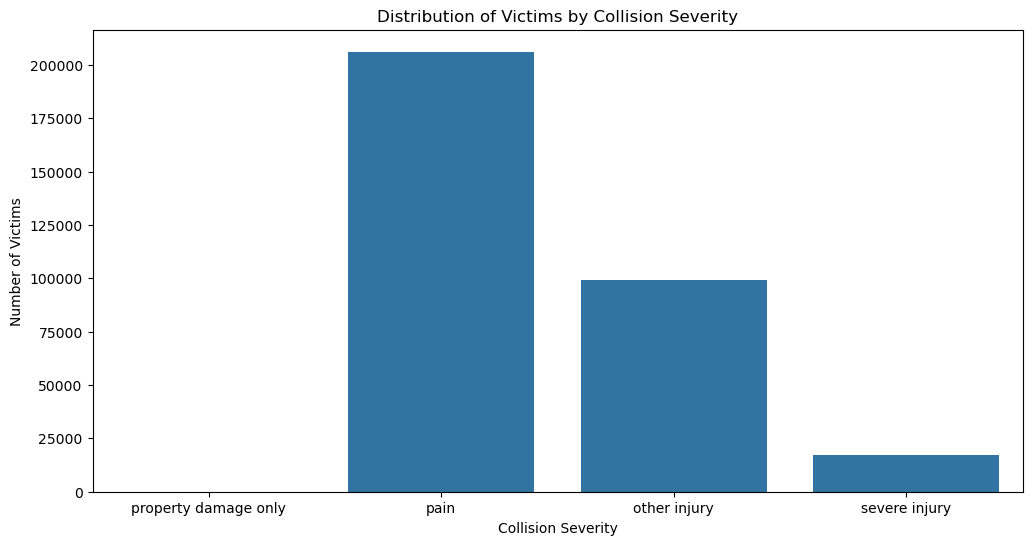

In [36]:
# Bivariate Analysis

# Collision Severity vs. Number of Victims
collision_sev_victims = spark.sql('SELECT severity, SUM(injured) AS total_injured FROM collisions GROUP BY severity;')
# Convert to Pandas
pd_collision_sev_victims = collision_sev_victims.toPandas()
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='severity', y='total_injured', data=pd_collision_sev_victims)
plt.title('Distribution of Victims by Collision Severity')
plt.xlabel('Collision Severity')
plt.ylabel('Number of Victims')
plt.show()

##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

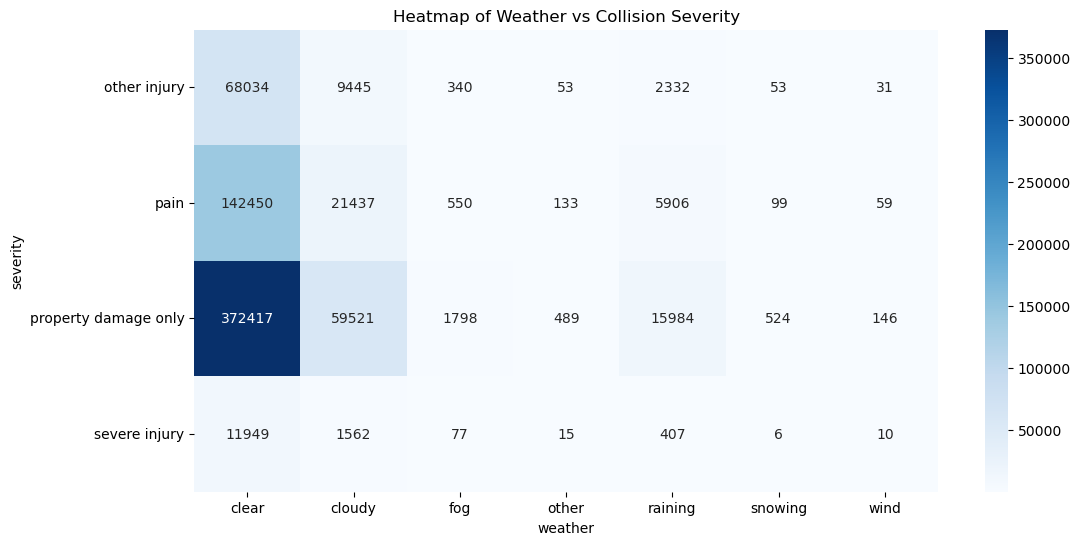

In [37]:
# Weather vs. Collision Severity

# Convert to Pandas
weather_vs_collision_sev = spark.sql('SELECT severity, weather FROM collisions;').toPandas()
contingency_table = pd.crosstab(weather_vs_collision_sev["severity"], weather_vs_collision_sev["weather"])
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Weather vs Collision Severity')
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

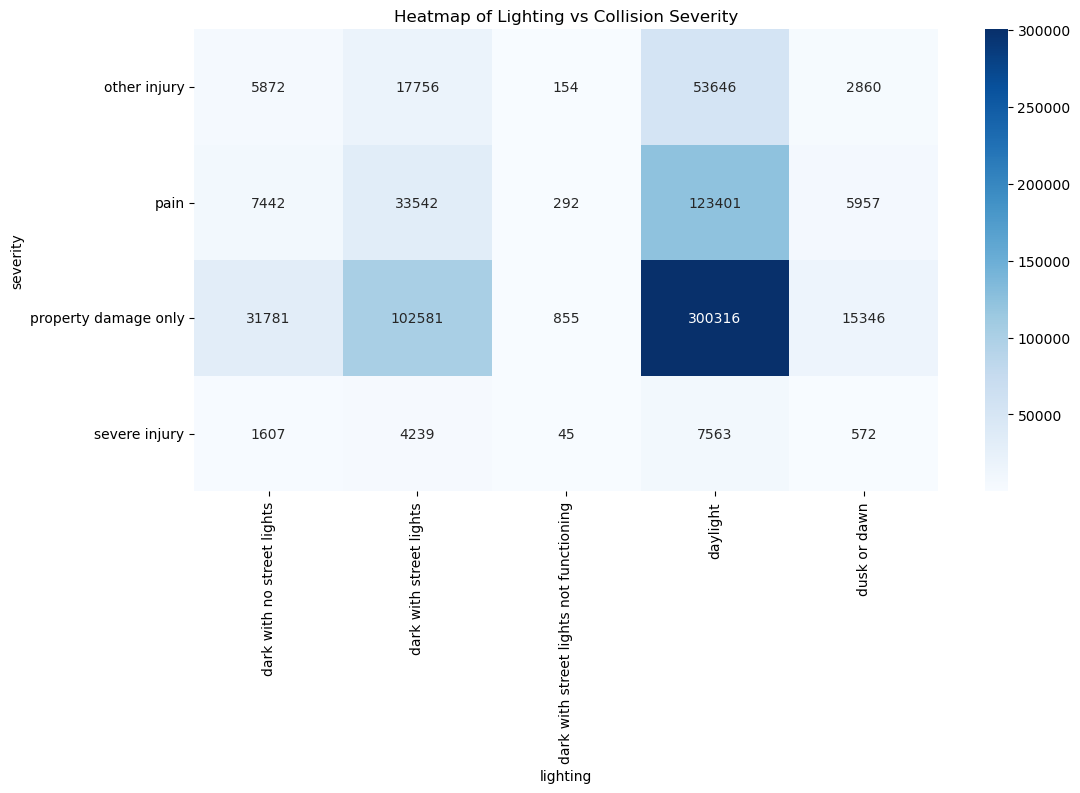

In [38]:
# Lighting Conditions vs. Collision Severity

# Convert to Pandas
weather_vs_collision_sev = spark.sql('SELECT severity, lighting FROM collisions;').toPandas()
contingency_table = pd.crosstab(weather_vs_collision_sev["severity"], weather_vs_collision_sev["lighting"])
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Lighting vs Collision Severity')
plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

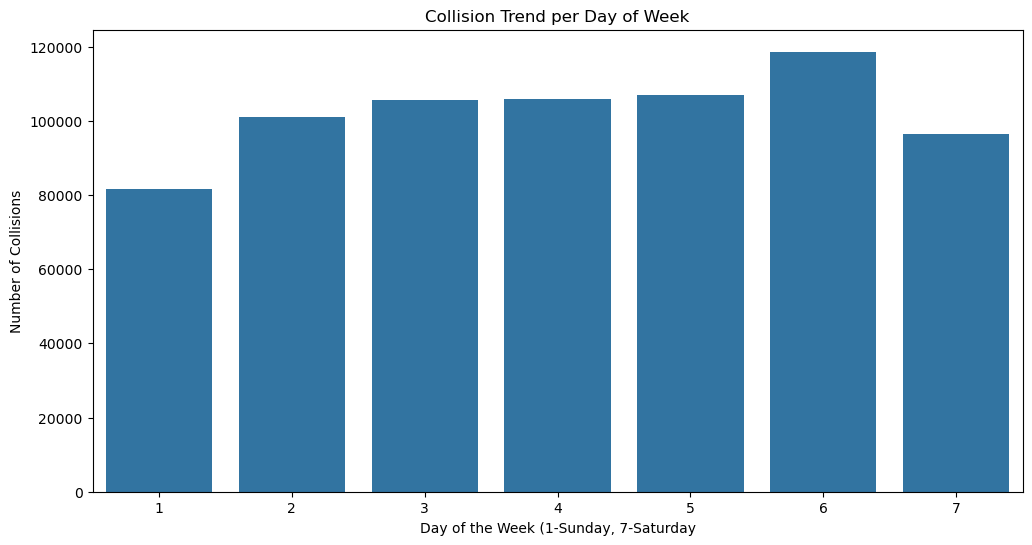

In [ ]:
# Extract the weekday
pd_weekday = spark.sql('SELECT collision_weekday FROM collisions;').toPandas()

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='collision_weekday', data=pd_weekday)
plt.title('Collision Trend per Day of Week')
plt.xlabel('Day of the Week (1-Sunday, 7-Saturday)')
plt.ylabel('Number of Collisions')
plt.show()

##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

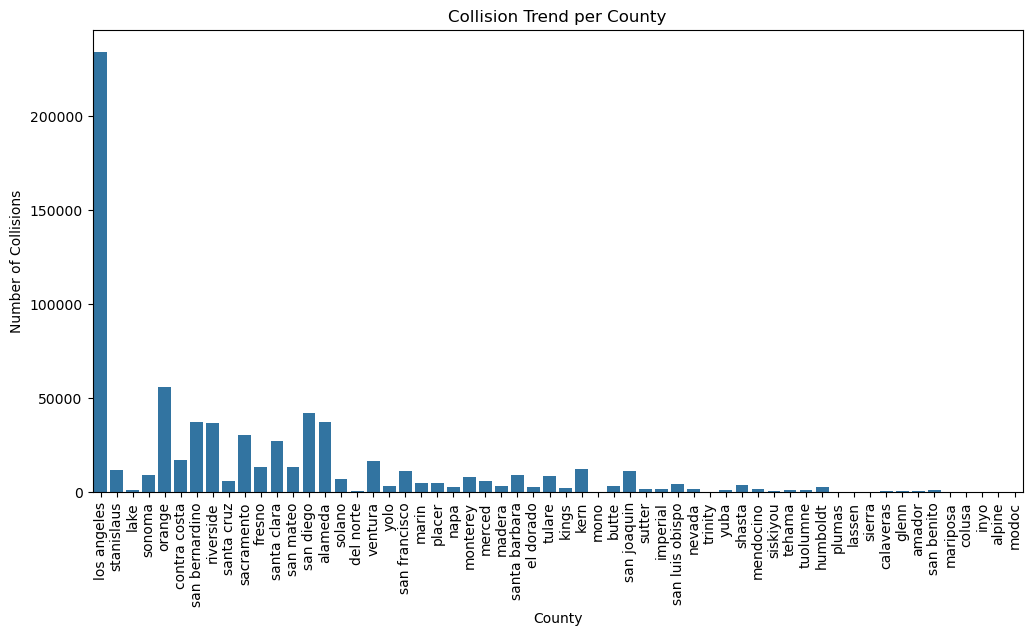

In [40]:
# Spatial Analysis

# Collision Density by County
pd_county_collisions = spark.sql("SELECT county FROM collisions;").toPandas()
# Plot the map
plt.figure(figsize=(12,6))
sns.countplot(x='county', data=pd_county_collisions)
plt.title('Collision Trend per County')
plt.xlabel('County')
plt.xticks(rotation=90)
plt.ylabel('Number of Collisions')
plt.show()

##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

In [41]:
# Scatter Plot of Collision Locations

# Convert PySpark DataFrame to Pandas, handling potential missing values

# Convert to numeric (if needed) and handle invalid data

# Plot the scatter plot


##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

In [42]:
from pyspark.sql.functions import year, month, hour, to_timestamp, col

# Extract year and month from collision_date
pd_timeseries = spark.sql('SELECT collision_day, collision_month, collision_year, collision_hour FROM collisions;').toPandas()
# Plot
pd_timeseries.head()

,collision_day,collision_month,collision_year,collision_hour
0,26,3,2019,6
1,19,2,2014,11
2,17,1,2014,20
3,17,5,2014,1
4,25,8,2007,11


Q: Analyze yearly, monthly and hourly trends in collisions.

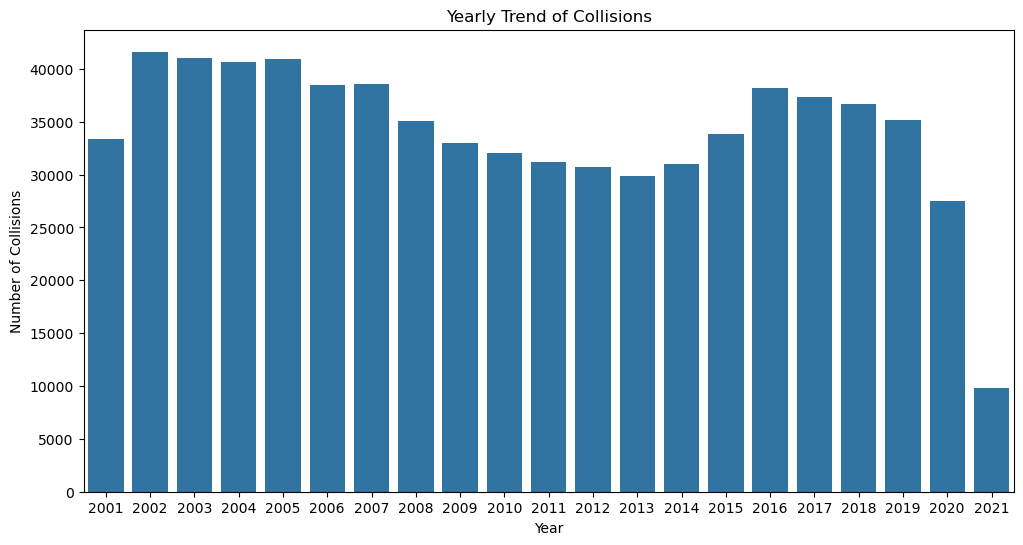

In [43]:
# Yearly Trend of Collisions

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='collision_year', data=pd_timeseries)
plt.title('Yearly Trend of Collisions')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.show()

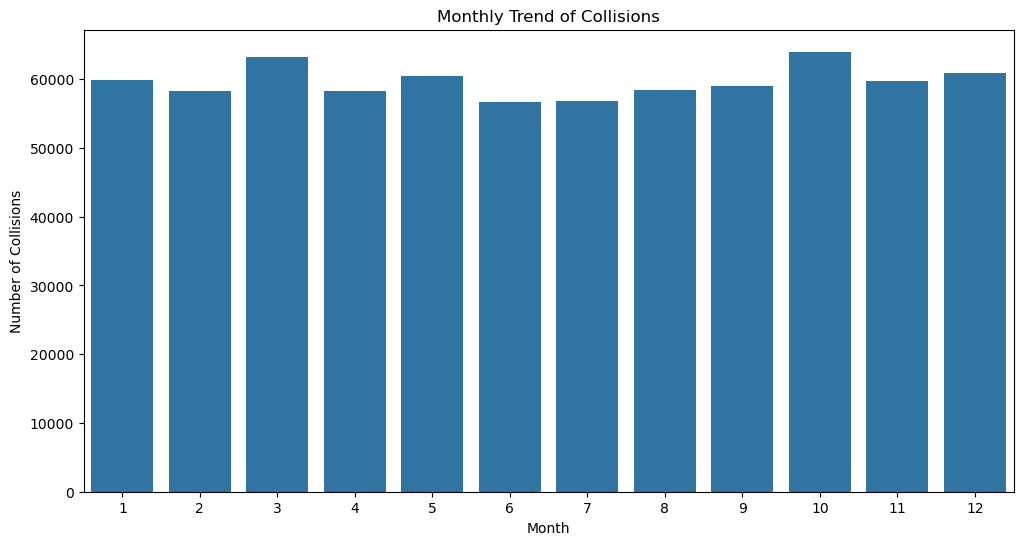

In [44]:
# Monthly Trend of Collisions

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='collision_month', data=pd_timeseries)
plt.title('Monthly Trend of Collisions')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.show()

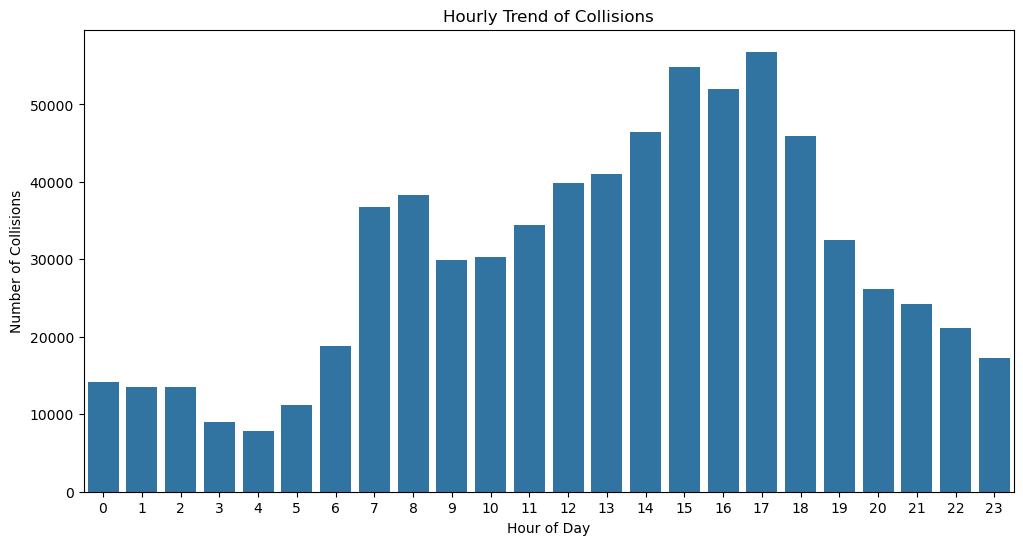

In [45]:
# Hourly Trend of Collisions

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='collision_hour', data=pd_timeseries)
plt.title('Hourly Trend of Collisions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [46]:
# Write your query here

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [47]:
# Query: Identify the top 5 counties with the most collisions
spark.sql('SELECT county, COUNT(county) AS collision_count FROM collisions GROUP BY county ORDER BY collision_count DESC Limit 5').show()

+--------------+---------------+
|        county|collision_count|
+--------------+---------------+
|   los angeles|         234157|
|        orange|          56144|
|     san diego|          42121|
|       alameda|          37387|
|san bernardino|          37365|
+--------------+---------------+



##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [48]:
# Query: Find the month with the highest number of collisions
spark.sql('SELECT collision_month, COUNT(collision_month) AS collision_count FROM collisions GROUP BY collision_month ORDER BY collision_count DESC Limit 1').show()

+---------------+---------------+
|collision_month|collision_count|
+---------------+---------------+
|             10|          63990|
+---------------+---------------+



##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [49]:
# Query: Find the most common weather condition during collisions
spark.sql('SELECT weather, COUNT(weather) AS collision_count FROM collisions GROUP BY weather ORDER BY collision_count DESC').show()

+-------+---------------+
|weather|collision_count|
+-------+---------------+
|  clear|         594850|
| cloudy|          91965|
|raining|          24629|
|    fog|           2765|
|  other|            690|
|snowing|            682|
|   wind|            246|
+-------+---------------+



##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [50]:
# Query: Determine the percentage of collisions that resulted in fatalities
spark.sql('SELECT SUM(killed)/COUNT(*)*100 AS fatality_percent FROM collisions').show()

+----------------+
|fatality_percent|
+----------------+
|             0.0|
+----------------+



##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [51]:
# Query: Find the most dangerous time of day for collisions
spark.sql('SELECT collision_hour, COUNT(collision_hour) AS collision_count FROM collisions GROUP BY collision_hour ORDER BY collision_count DESC Limit 5').show()

+--------------+---------------+
|collision_hour|collision_count|
+--------------+---------------+
|            17|          56806|
|            15|          54770|
|            16|          51963|
|            14|          46466|
|            18|          45898|
+--------------+---------------+



##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [52]:
# Query: List the top 5 road types with the highest collision frequency
spark.sql('SELECT road_type, COUNT(road_type) AS collision_count FROM collisions GROUP BY road_type ORDER BY collision_count DESC Limit 5').show()

+---------+---------------+
|road_type|collision_count|
+---------+---------------+
|        0|         584715|
|        1|         115204|
|        6|           8843|
|        5|           5864|
|        4|            884|
+---------+---------------+



##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [53]:
# Query: Find the top 3 lighting conditions that lead to the most collisions
spark.sql('SELECT lighting, COUNT(lighting) AS collision_count FROM collisions GROUP BY lighting ORDER BY collision_count DESC Limit 3').show()

+--------------------+---------------+
|            lighting|collision_count|
+--------------------+---------------+
|            daylight|         484926|
|dark with street ...|         158118|
|dark with no stre...|          46702|
+--------------------+---------------+



#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

In [54]:
# Final insights and recommendations


#### Infrastructure and Strategic Planning
The analysis identifies specific high-risk locations and temporal trends that warrant targeted infrastructure interventions:

High-Risk Counties: Strategic safety audits should be prioritized for the top 5 counties with the highest collision frequency.

Peak Collision Times: Infrastructure improvements, such as improved lighting and automated traffic monitoring, should be focused on the "most dangerous time of day" identified in the time-series analysis.

Road Design Optimization: By analyzing the correlation between road surface conditions and accident frequency, city planners can identify areas requiring resurfacing or specialized drainage to mitigate hazards during unfavourable weather.


#### Traffic Management and Operational Adjustments
Data-driven insights into environmental and operational factors suggest the following operational changes:

Lighting and Visibility: Given that a fair number of accidents occur in "dark with street lights" conditions, local authorities should evaluate the lighting conditions and placement of street lighting to improve nighttime visibility.

Signal Timing: Traffic signal cycles should be optimized based on the identified peak collision hours to manage traffic flow more effectively and reduce rear-end collisions, which were found to be a frequent collision type.

Variable Speed Limits: Implementing weather-responsive speed limits in areas identified as high-risk during "cloudy" or "raining" conditions can reduce the severity of accidents.

Pedestrian and Cyclist Safety: Policy changes should prioritize the creation of dedicated bike lanes and enhanced pedestrian crossings in zones where accidents involving these vulnerable groups are most prevalent.

Age-Specific Interventions: Based on the victim age distribution analysis, safety awareness campaigns or specialized driver training should be targeted toward the most vulnerable or high-risk age demographics.


#### Recommendations
High-Risk Zones: Utilizing collision density maps, law enforcement can establish "proactive intervention zones" for increased patrolling or the placement of safety signage.

Predictive Modeling: The project provides a foundation for developing predictive models that can anticipate collision hotspots based on historical data, enabling authorities to implement preventative measures before incidents occur.


#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>